# Chapter: Finding Groups in Process Data: Clustering & Mixture Modeling

# Topic: GMM algorithm 

In [34]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          GMM algorithm for the illustration example
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [35]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

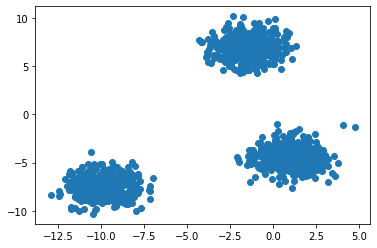

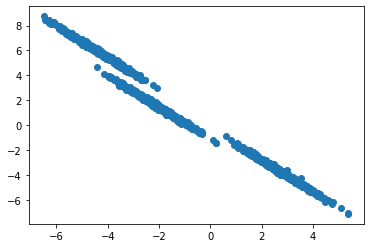

In [45]:
#%% generate data
n_samples = 1500
X, _ = make_blobs(n_samples=n_samples, random_state=100)

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.show()

rotation_matrix = [[0.60, -0.70], [-0.5, 0.7]]
X_transformed = np.dot(X, rotation_matrix)

plt.figure()
plt.scatter(X_transformed[:,0], X_transformed[:,1])
plt.show()

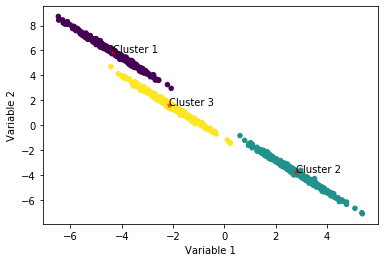

In [46]:
# fit GMM model
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3, random_state = 100)
cluster_label = gmm.fit_predict(X_transformed)

plt.figure()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c = cluster_label, s=20, cmap='viridis')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')

cluster_centers = gmm.means_ # cluster centers
cluster_plot_labels = ['Cluster ' + str(i+1) for i in range(gmm.n_components)]
for i in range(gmm.n_components):
    plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], c='red', s=20, marker = '*', alpha=0.5)
    plt.annotate(cluster_plot_labels[i], (cluster_centers[i,0], cluster_centers[i,1]))

plt.show()

In [47]:
# membership probabilities
probs = gmm.predict_proba(X_transformed[1069,np.newaxis]) # predict_proba requires 2D array
print('Posterior probablities of clusters 1, 2, 3 for the data-point: ', probs[-1,:])

Posterior probablities of clusters 1, 2, 3 for the data-point:  [3.36420271e-54 1.09823698e-15 1.00000000e+00]


In [48]:
# posterior probability calculation
x = X_transformed[1069,np.newaxis]

import scipy.stats
g1 = scipy.stats.multivariate_normal(gmm.means_[0,:], gmm.covariances_[0,:]).pdf(x)
g2 = scipy.stats.multivariate_normal(gmm.means_[1,:], gmm.covariances_[1,:]).pdf(x)
g3 = scipy.stats.multivariate_normal(gmm.means_[2,:], gmm.covariances_[2,:]).pdf(x)
print('Local component densities: ', g1, g2, g3)

den = gmm.weights_[0]*g1 + gmm.weights_[1]*g2 + gmm.weights_[2]*g3
posterior_prob_cluster1 = gmm.weights_[0]*g1/den
posterior_prob_cluster2 = gmm.weights_[1]*g2/den
posterior_prob_cluster3 = gmm.weights_[2]*g3/den 
print('Posterior probabilities: ', posterior_prob_cluster1, posterior_prob_cluster2, posterior_prob_cluster3)

Local component densities:  8.334249913127348e-56 2.720698553088773e-17 0.024773328609668892
Posterior probabilities:  3.3642027054349243e-54 1.098236977338138e-15 0.999999999999999


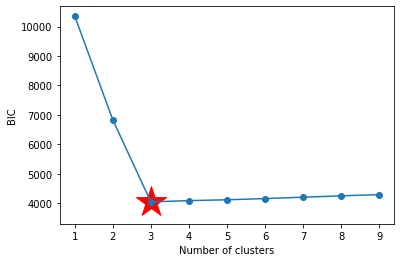

In [49]:
# finding # of components via BIC method
BICs = []
lowestBIC = np.inf
for n_cluster in range(1, 10):
    gmm = GaussianMixture(n_components = n_cluster, random_state = 100)
    gmm.fit(X_transformed)
    BIC = gmm.bic(X_transformed)
    BICs.append(BIC)
    
    if BIC < lowestBIC:
        optimal_n_cluster = n_cluster 
        lowestBIC = BIC

plt.figure()
plt.plot(range(1,10), BICs, marker='o')
plt.scatter(optimal_n_cluster, lowestBIC, c='red', marker='*', s=1000)
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()

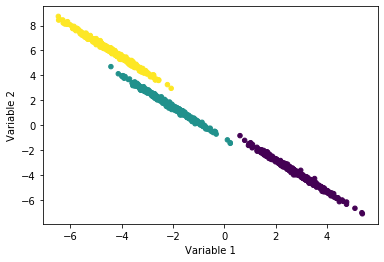

[0 1 2]


In [50]:
# finding # of components via FJ algorithm
from gmm_mml import GmmMml
gmmFJ = GmmMml(plots=False)
gmmFJ.fit(X_transformed)
cluster_label = gmmFJ.predict(X_transformed)

plt.figure()
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c = cluster_label, s=20, cmap='viridis')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()

clusters = np.unique(cluster_label)
print(clusters)